(512, 512, 3)


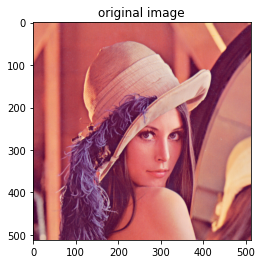

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt 
  
# reads image as RGB 
img = cv2.imread('lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# original RGB image 
plt.title("original image")
plt.imshow(img)
print(img.shape)
# print(img)

Text(0.5, 1.0, 'grayscale')

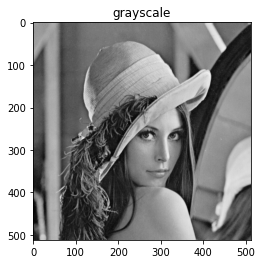

In [2]:
# f ’(x,y) =(0.299r(x,y)+0.587g(x,y)+0.114b(x,y))
gray_img = np.array([[0]*512]*512)
# print(gray_img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        gray_img[i][j] = img[i][j][0]*0.299 + img[i][j][1]*0.587 + img[i][j][2]*0.114
# print(gray_img)
plt.imshow(gray_img,cmap='gray')
plt.title("grayscale")
# print(gray_img)

Text(0.5, 1.0, 'B1 image')

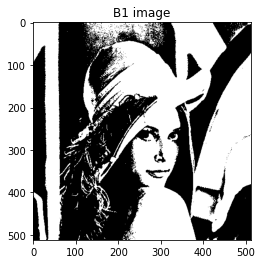

In [3]:
b1_img = np.array([[0]*512]*512)
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        if(gray_img[i][j]<=127):
            b1_img[i][j]=0
        else:
            b1_img[i][j]=255
plt.imshow(b1_img,cmap='gray')
plt.title("B1 image")

In [8]:
# b2_img = gray_img
b2_img = gray_img[0:512,0:512].copy()
# plt.imshow(b2_img,cmap="gray")
# print(b2_img.shape)
for i in range(b2_img.shape[0]-1):
    for j in range(b2_img.shape[1]-1):
        temp = b2_img[i][j]
        if(b2_img[i][j]<=127):
            b2_img[i][j]=0
        else:
            b2_img[i][j]=255
            
        error = temp - b2_img[i][j]
        b2_img[i+1][j] += (error*3)/8
        b2_img[i+1][j+1] += (error*2)/8
        b2_img[i][j+1] += (error*3)/8
        
        if b2_img[i+1][j] > 255:
            b2_img[i+1][j] = 255
        elif b2_img[i+1][j] < 0:
            b2_img[i+1][j] = 0
            
        if b2_img[i][j+1] > 255:
            b2_img[i][j+1] = 255
        elif b2_img[i][j+1] < 0:
            b2_img[i][j+1] = 0
            
        if b2_img[i+1][j+1] > 255:
            b2_img[i+1][j+1] = 255
        elif b2_img[i+1][j+1] < 0:
            b2_img[i+1][j+1] = 0

In [9]:
print(b2_img)

[[255   0 255 ... 255   0 168]
 [  0 255 255 ... 255   0 197]
 [255 255   0 ... 255   0 201]
 ...
 [  0 255   0 ... 255   0 137]
 [  0   0   0 ... 255   0 146]
 [ 68  74  76 ...  88  97 121]]


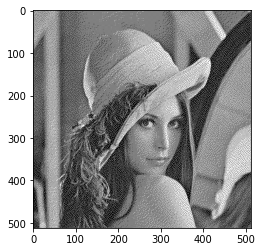

In [7]:
plt.imshow(b2_img,cmap='gray')

In [10]:
error_b1 = 0
for i in range(b1_img.shape[0]-1):
    for j in range(b1_img.shape[1]-1):
        error_b1 += abs(gray_img[i][j] - b1_img[i][j])
error_b1 /=((b1_img.shape[0]-1)*(b1_img.shape[1]-1))
print(error_b1)

87.98129219786995


In [11]:
error_b2 = 0
for i in range(b2_img.shape[0]-1):
    for j in range(b2_img.shape[1]-1):
        error_b2 += abs(gray_img[i][j] - b2_img[i][j])
error_b2 /=((b2_img.shape[0]-1)*(b2_img.shape[1]-1))
print(error_b2)

109.33708510613853


In [ ]:
for i in range